In [1]:
import numpy as np
import math
import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('trainDataset.csv', na_values = 999)

In [4]:
data

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1.0,144.000000,41.0,0,0.0,0.0,1.0,3.0,3.0,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0.0,142.000000,39.0,1,1.0,0.0,0.0,3.0,3.0,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1.0,135.000000,31.0,0,0.0,0.0,1.0,2.0,1.0,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0.0,12.000000,35.0,0,0.0,0.0,1.0,3.0,3.0,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0.0,109.000000,61.0,1,0.0,0.0,0.0,2.0,1.0,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,TRG002955,1.0,49.250000,46.1,0,0.0,0.0,1.0,3.0,3.0,...,0.439568,0.439568,3.056046,0.001339,1.671271e+07,79.989003,0.003282,0.024716,0.000812,0.003078
396,TRG002958,0.0,48.500000,53.3,0,0.0,0.0,1.0,2.0,1.0,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
397,TRG002961,0.0,47.500000,68.8,1,0.0,0.0,0.0,3.0,3.0,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368
398,TRG002962,0.0,46.916667,46.0,1,0.0,0.0,0.0,2.0,1.0,...,0.670229,0.670229,1.857045,0.006706,5.609262e+05,9.609163,0.026591,0.018682,0.000311,0.022676


# Finding and removing missing values

In [6]:
df = data.dropna(axis='rows')
df

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1.0,144.000000,41.0,0,0.0,0.0,1.0,3.0,3.0,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0.0,142.000000,39.0,1,1.0,0.0,0.0,3.0,3.0,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1.0,135.000000,31.0,0,0.0,0.0,1.0,2.0,1.0,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0.0,12.000000,35.0,0,0.0,0.0,1.0,3.0,3.0,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0.0,109.000000,61.0,1,0.0,0.0,0.0,2.0,1.0,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,TRG002955,1.0,49.250000,46.1,0,0.0,0.0,1.0,3.0,3.0,...,0.439568,0.439568,3.056046,0.001339,1.671271e+07,79.989003,0.003282,0.024716,0.000812,0.003078
396,TRG002958,0.0,48.500000,53.3,0,0.0,0.0,1.0,2.0,1.0,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
397,TRG002961,0.0,47.500000,68.8,1,0.0,0.0,0.0,3.0,3.0,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368
398,TRG002962,0.0,46.916667,46.0,1,0.0,0.0,0.0,2.0,1.0,...,0.670229,0.670229,1.857045,0.006706,5.609262e+05,9.609163,0.026591,0.018682,0.000311,0.022676


In [53]:
na_values = df.isnull()
num_rows = 0
num_na = 0
for i in range(1,120):
    x = sum(na_values.iloc[:,i])
    if x > 0:
        num_rows += 1
        num_na += x
print(num_rows)
print(num_na)

0
0


# Initial Data Exploration

In [8]:
clinical_data = df.iloc[:,1:13]
image_data = df.iloc[:,13:]

In [9]:
clinical_data.head()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage
0,1.0,144.0,41.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2
1,0.0,142.0,39.0,1,1.0,0.0,0.0,3.0,3.0,1.0,1.0,2
2,1.0,135.0,31.0,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2
3,0.0,12.0,35.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,3
4,0.0,109.0,61.0,1,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2


In [10]:
image_data.shape

(390, 107)

In [11]:
clinical_data.shape

(390, 12)

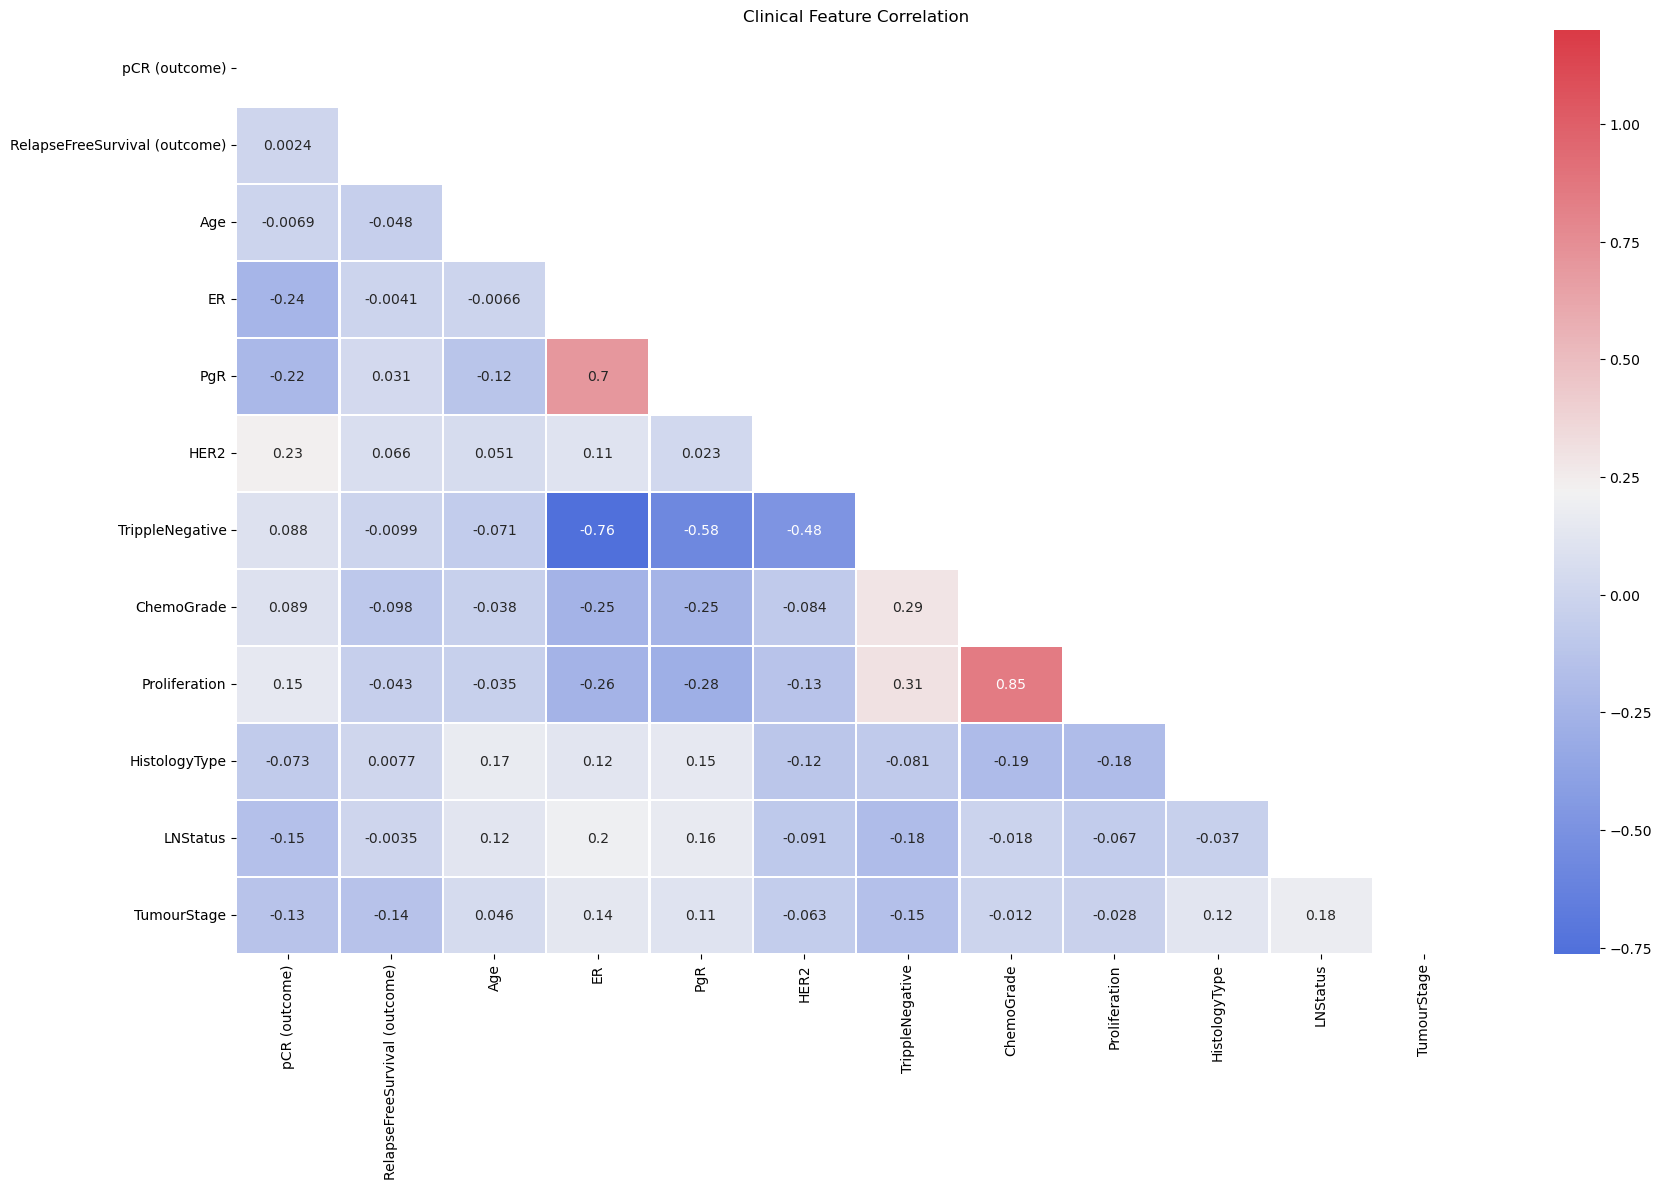

In [12]:
corrMatt = clinical_data.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Clinical Feature Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1);

So seems like ER, PgR, HER2, Proliferation, LNStatus, and Tumour Stage have highest correlation with pCR
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5387027/

In [13]:
x = sum(clinical_data["ER"])+sum(clinical_data["PgR"])+sum(clinical_data["HER2"])
print(f'Patients with ER breast cancer: {(100*sum( clinical_data["ER"] )/x):.2f}%, Patients with PgR breast cancer: {(100*sum( clinical_data["PgR"] )/x):.2f}%, Patients with HER2 breast cancer: {(100*sum( clinical_data["HER2"])/x):.2f}%')

Patients with ER breast cancer: 42.89%, Patients with PgR breast cancer: 31.91%, Patients with HER2 breast cancer: 25.20%


Text(0.5, 0, 'Age')

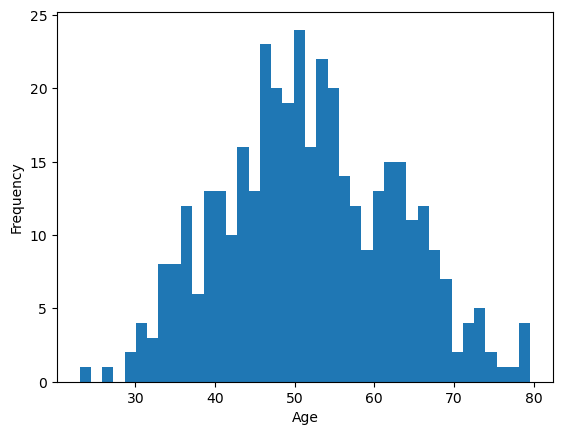

In [14]:
plt.hist(df['Age'],bins=40)
plt.ylabel('Frequency')
plt.xlabel('Age')

In [15]:
clinical_data.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,0.241026,55.986325,51.895010,0.541026,0.402564,0.317949,0.330769,2.400000,1.584615,1.141026,0.517949,2.589744
std,0.428255,26.788032,10.899997,0.498954,0.491044,0.466278,0.471094,0.500899,0.770116,0.348495,0.500320,0.887443
min,0.000000,5.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,38.000000,44.334702,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000
50%,0.000000,55.000000,51.242984,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000
75%,0.000000,73.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,3.000000
max,1.000000,144.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,4.000000


pCR (outcome)                       AxesSubplot(0.125,0.798085;0.168478x0.0819149)
RelapseFreeSurvival (outcome)    AxesSubplot(0.327174,0.798085;0.168478x0.0819149)
Age                              AxesSubplot(0.529348,0.798085;0.168478x0.0819149)
ER                               AxesSubplot(0.731522,0.798085;0.168478x0.0819149)
PgR                                 AxesSubplot(0.125,0.699787;0.168478x0.0819149)
HER2                             AxesSubplot(0.327174,0.699787;0.168478x0.0819149)
TrippleNegative                  AxesSubplot(0.529348,0.699787;0.168478x0.0819149)
ChemoGrade                       AxesSubplot(0.731522,0.699787;0.168478x0.0819149)
Proliferation                       AxesSubplot(0.125,0.601489;0.168478x0.0819149)
HistologyType                    AxesSubplot(0.327174,0.601489;0.168478x0.0819149)
LNStatus                         AxesSubplot(0.529348,0.601489;0.168478x0.0819149)
TumourStage                      AxesSubplot(0.731522,0.601489;0.168478x0.0819149)
dtyp

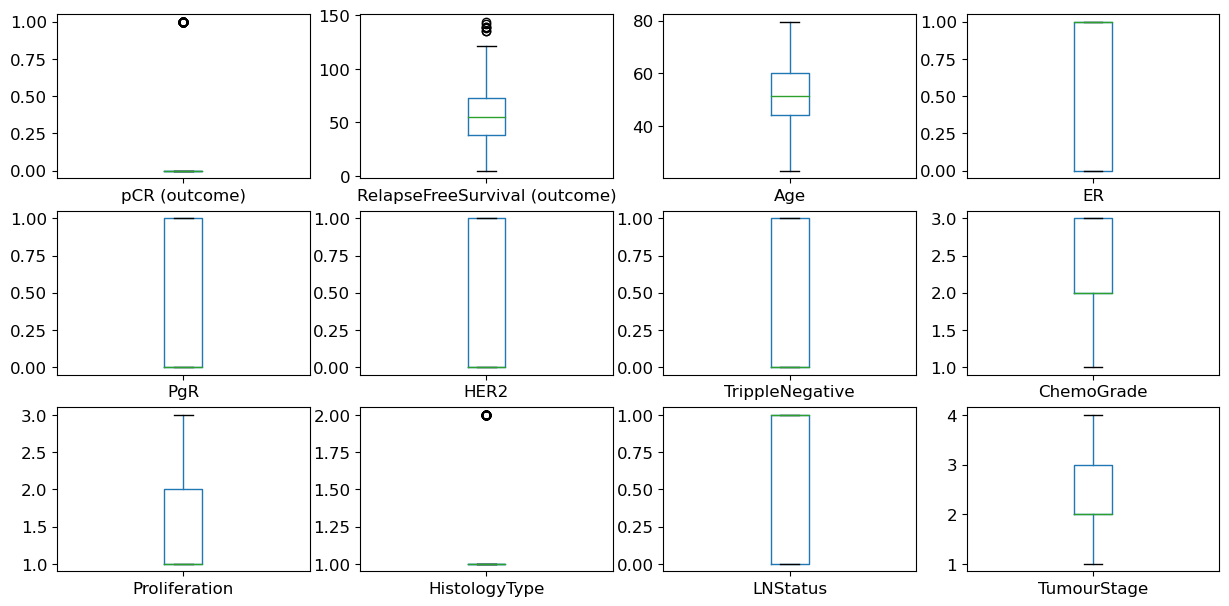

In [16]:
clinical_data.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

In [17]:
clinical_data['HistologyType'].value_counts()

1.0    335
2.0     55
Name: HistologyType, dtype: int64

Histology Type is either 1 or 2, with most being 1

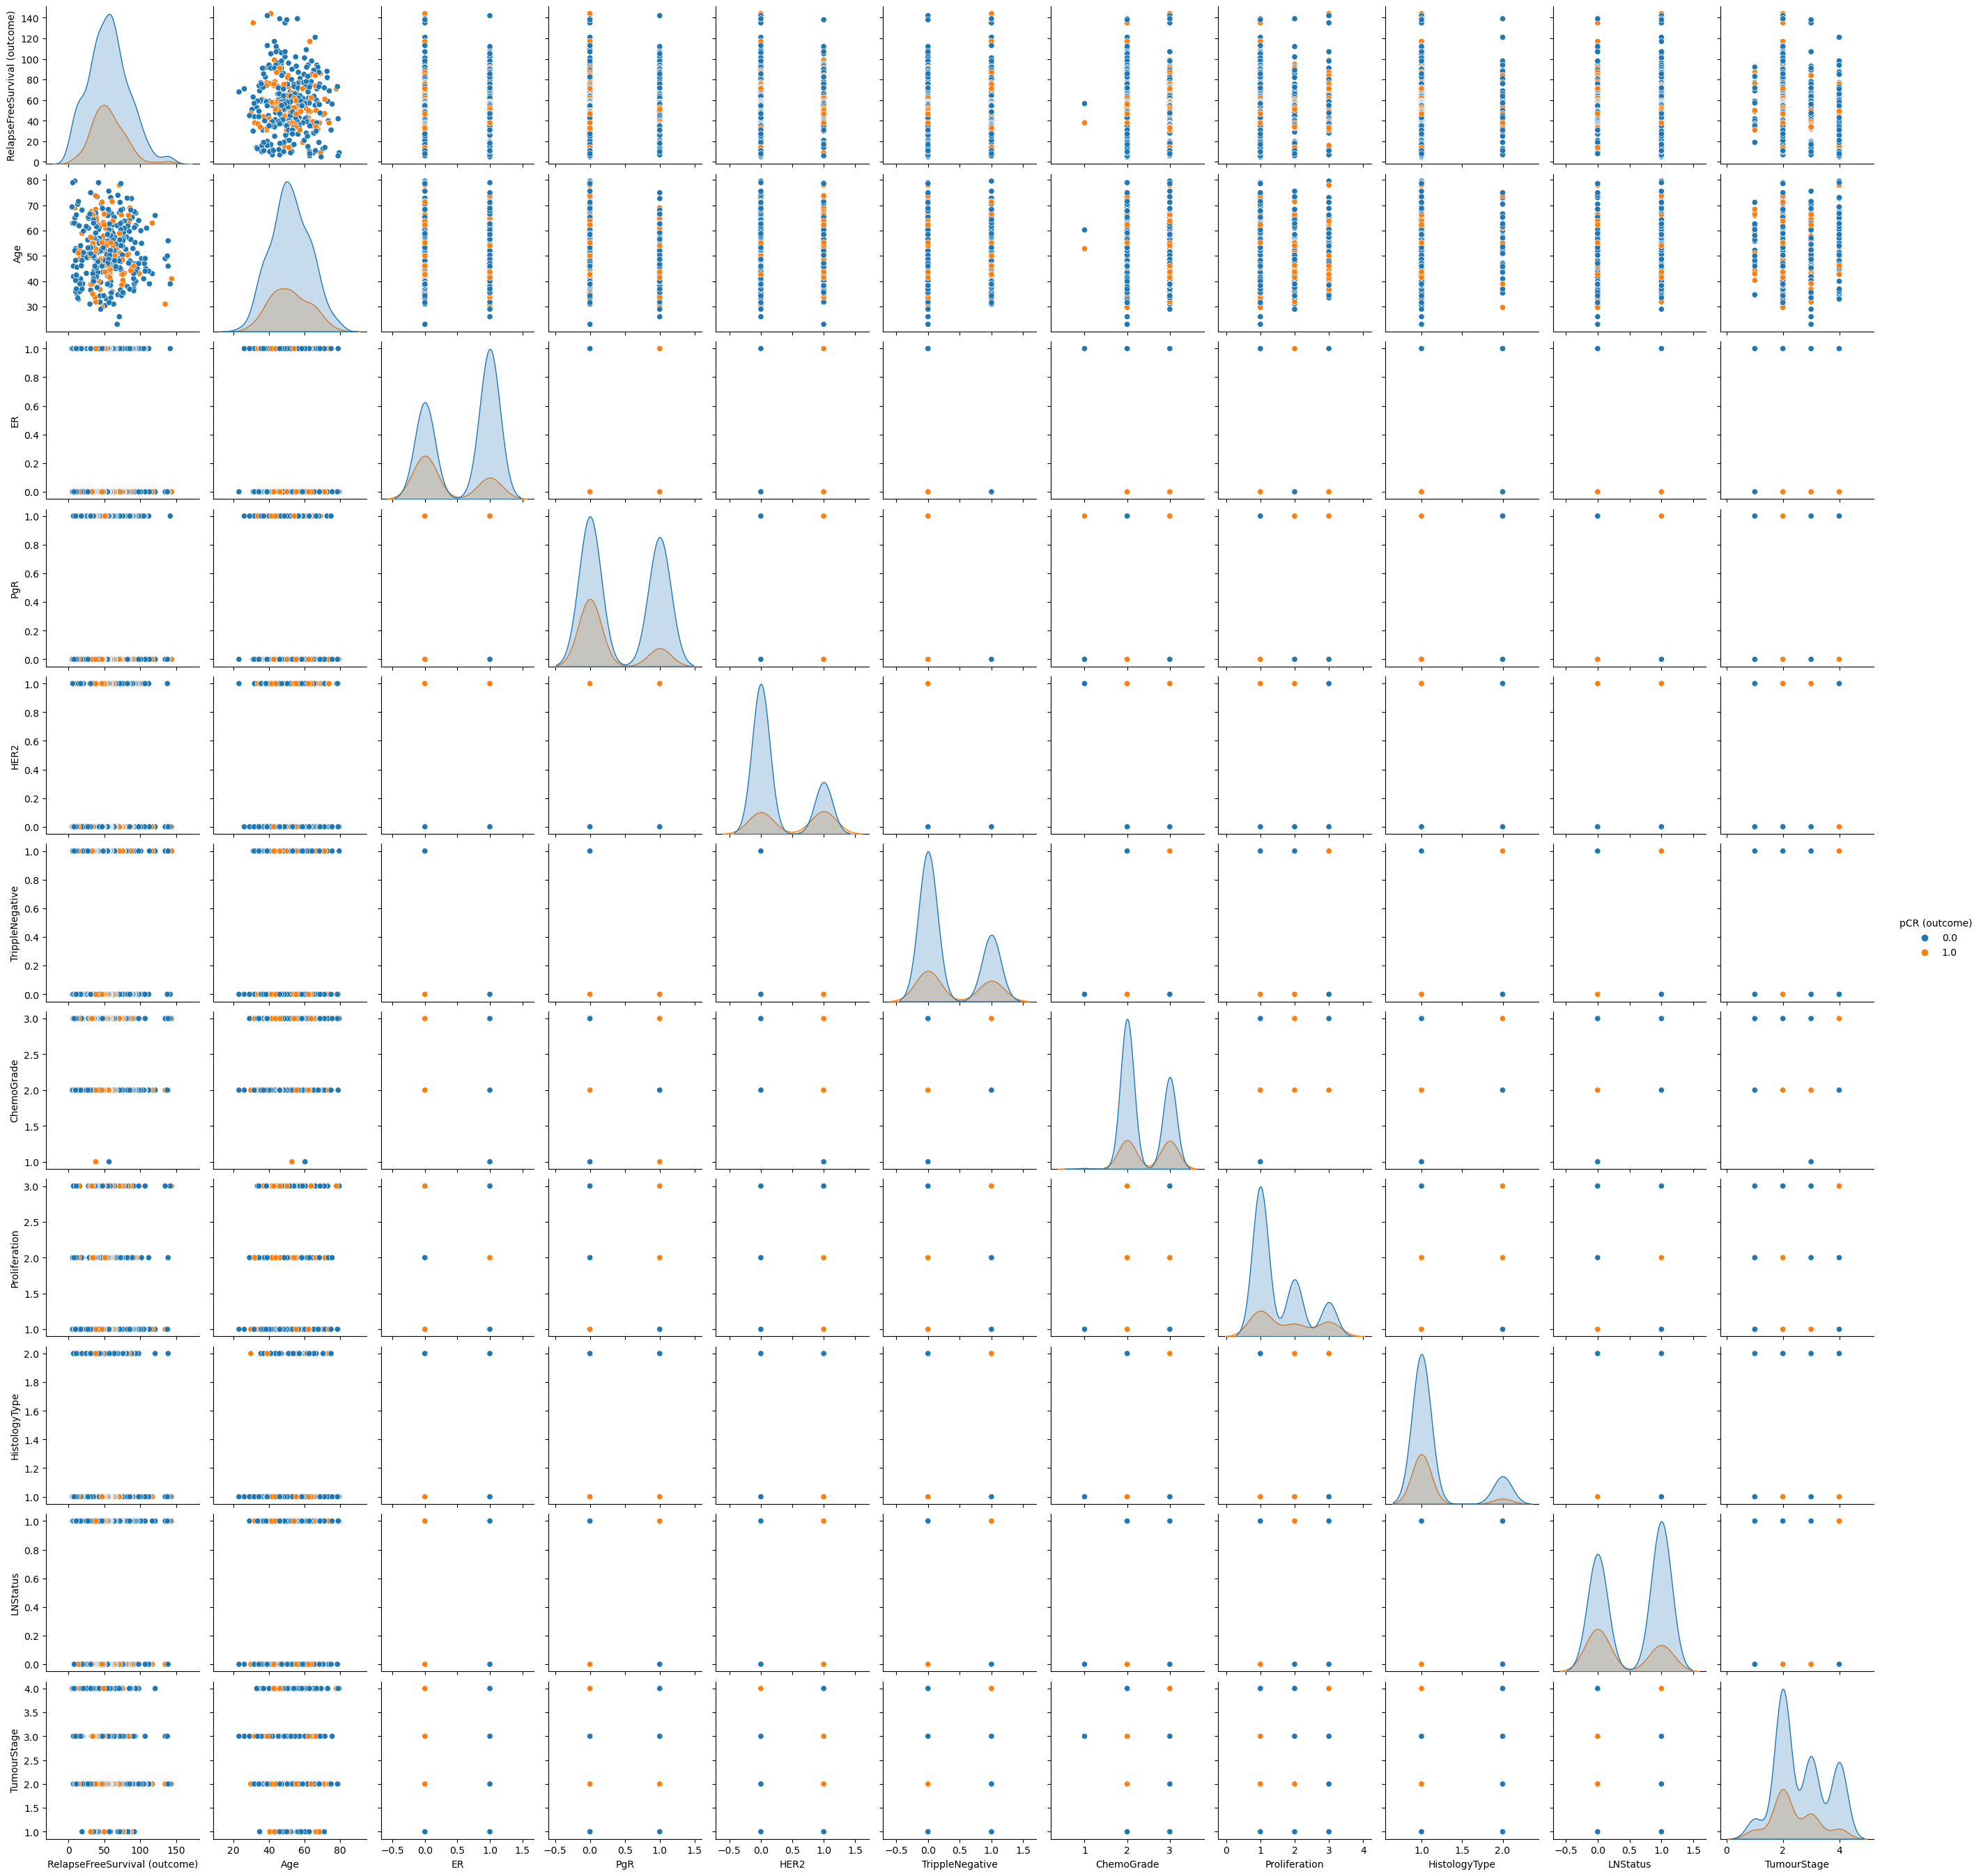

In [18]:
sns.pairplot(clinical_data, hue="pCR (outcome)");

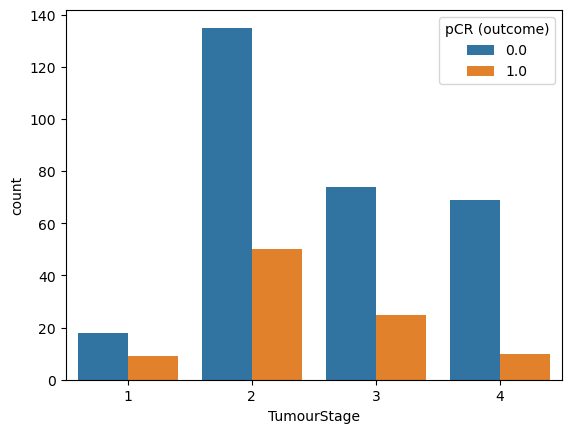

In [19]:
sns.countplot(x = clinical_data['TumourStage'], hue = clinical_data['pCR (outcome)'])

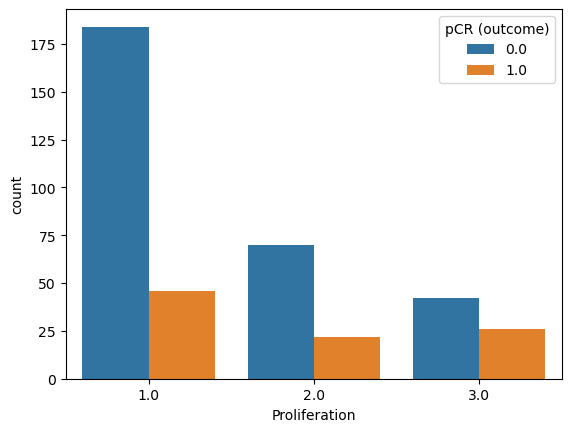

In [20]:
sns.countplot(x = clinical_data['Proliferation'], hue = clinical_data['pCR (outcome)'])

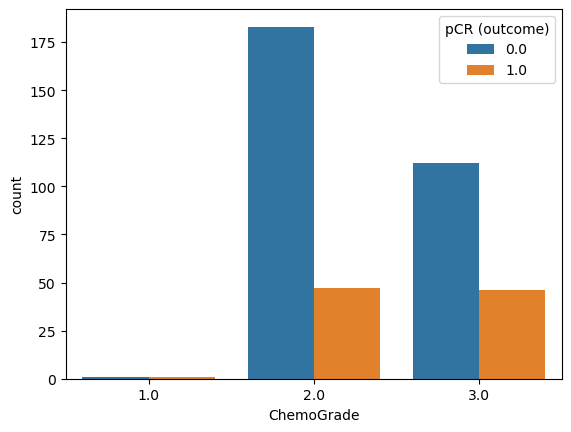

In [21]:
sns.countplot(x = clinical_data['ChemoGrade'], hue = clinical_data['pCR (outcome)'])

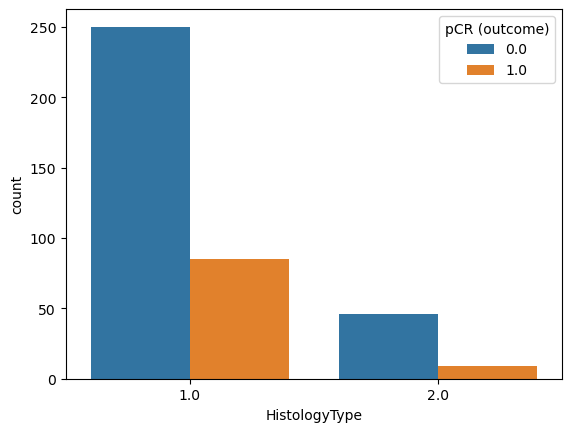

In [22]:
sns.countplot(x = clinical_data['HistologyType'], hue = clinical_data['pCR (outcome)'])

In [23]:
#sns.countplot(x = clinical_data['HistologyType'], hue = clinical_data['pCR (outcome)'])
image_data.describe()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,3.900000e+02,3.900000e+02,3.900000e+02,390.000000,3.900000e+02,390.000000,390.000000,390.000000,390.000000,390.000000
mean,0.718016,0.551806,23.177775,47.207878,47.899036,44.914299,47.706157,56.034598,20317.544124,31.444138,...,3.934913e-01,3.887566e-01,2.710242e+00,0.003289,5.816095e+07,179.910430,33333.366536,0.056791,0.005986,0.029857
std,0.164154,0.170412,9.962374,29.904002,23.918677,25.953400,27.381707,31.236854,34326.962668,14.992007,...,1.683854e-01,1.632534e-01,7.605737e-01,0.002411,7.153534e+08,1058.448171,179736.066162,0.047600,0.008476,0.117343
min,0.139299,0.099076,5.488466,12.466885,12.165525,13.038405,12.369317,15.524175,522.541667,9.197979,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.621737,0.421095,16.663832,28.398048,31.144823,29.154759,30.149627,34.953536,5819.156250,21.081964,...,3.205498e-01,3.160505e-01,2.330305e+00,0.001326,1.148583e+06,20.981715,0.001839,0.018521,0.000307,0.001470
50%,0.746311,0.556919,21.600941,39.092170,41.054805,38.522581,39.924859,47.555208,12080.312500,27.653383,...,4.098427e-01,4.054695e-01,2.808317e+00,0.002838,3.452277e+06,68.792709,0.004371,0.047029,0.002301,0.003194
75%,0.841814,0.690237,27.838495,58.316002,59.411699,55.326449,58.443789,69.070604,23518.145832,38.012207,...,4.997438e-01,4.953474e-01,3.277613e+00,0.004689,9.302651e+06,156.069738,0.013179,0.085482,0.008007,0.009174
max,0.985424,0.872753,92.516207,326.866827,155.756220,241.530536,237.033753,242.614921,528765.458300,126.141700,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [24]:
age_category = pd.cut(clinical_data.Age, bins = [0,30,40,50,60,70,99], labels = ['<30', '30-40', '40-50', '50-60', '60-70', '>70'])
clinical_data.insert(3, 'AgeGroup', age_category)

In [25]:
clinical_data

,pCR (outcome),RelapseFreeSurvival (outcome),Age,AgeGroup,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage
0,1.0,144.000000,41.0,40-50,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2
1,0.0,142.000000,39.0,30-40,1,1.0,0.0,0.0,3.0,3.0,1.0,1.0,2
2,1.0,135.000000,31.0,30-40,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2
3,0.0,12.000000,35.0,30-40,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,3
4,0.0,109.000000,61.0,60-70,1,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,49.250000,46.1,40-50,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,4
396,0.0,48.500000,53.3,50-60,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2
397,0.0,47.500000,68.8,60-70,1,0.0,0.0,0.0,3.0,3.0,1.0,1.0,3
398,0.0,46.916667,46.0,40-50,1,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2


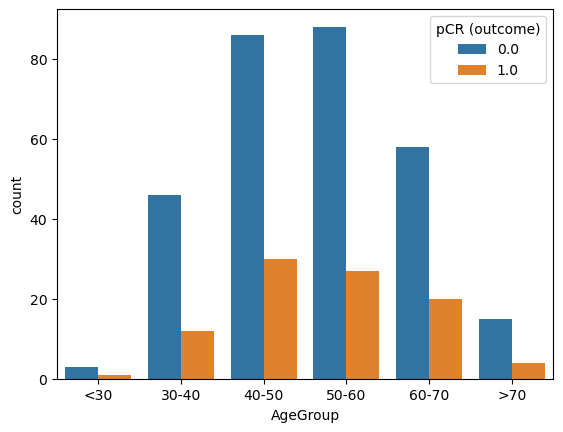

In [26]:
sns.countplot(x = clinical_data['AgeGroup'], hue = clinical_data['pCR (outcome)'])

Want feature selection to reduce impact of curse of dimensionality

## Logistic regression

In [47]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
#clinical_data = clinical_data.drop(['AgeGroup'], axis =1)
X = clinical_data.drop(['pCR (outcome)'], axis=1)

# converting into numpy array
X = X.values
y = clinical_data['pCR (outcome)'].values

In [48]:
#Standardise. I think it is better to standardise after split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [49]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
m = model.fit(X_train,y_train)